# II. Programming and critical analysis

### 1.

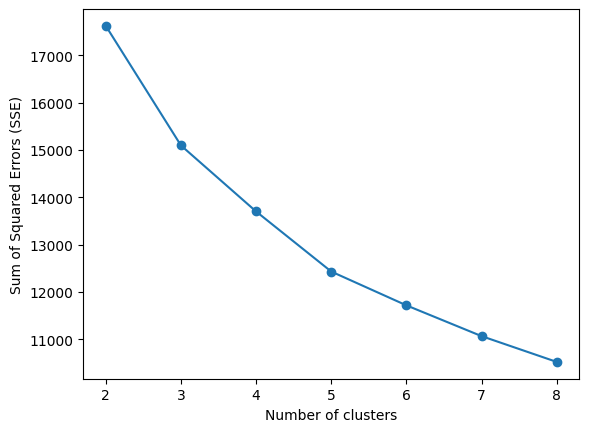

In [77]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('accounts.csv')
df = df[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan']]
df = df.drop_duplicates().dropna()
df = pd.get_dummies(df, drop_first=True)

df_minmax_normalized = MinMaxScaler().fit_transform(df)

sse = []
k_values = range(2, 9)
for k in k_values:
    kmeans = KMeans(n_clusters=k, max_iter=500, random_state=42)
    kmeans.fit(df_minmax_normalized)
    sse.append(kmeans.inertia_)

plt.plot(k_values, sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()



### 2.

a)

In [78]:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df_standard_normalized = StandardScaler().fit_transform(df)

pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_standard_normalized)

explained_variance = pca.explained_variance_ratio_.sum()
explained_variance


0.2275500322306342

b)

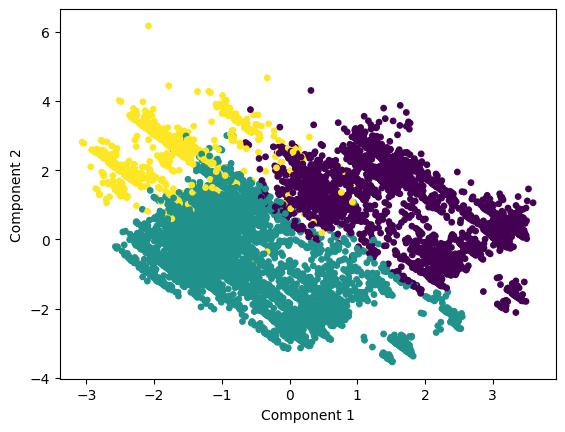

In [83]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_model = kmeans.fit(df_standard_normalized)


plt.scatter(pca_components[:, 0], pca_components[:, 1], c=kmeans_model.labels_, s=15)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

c)


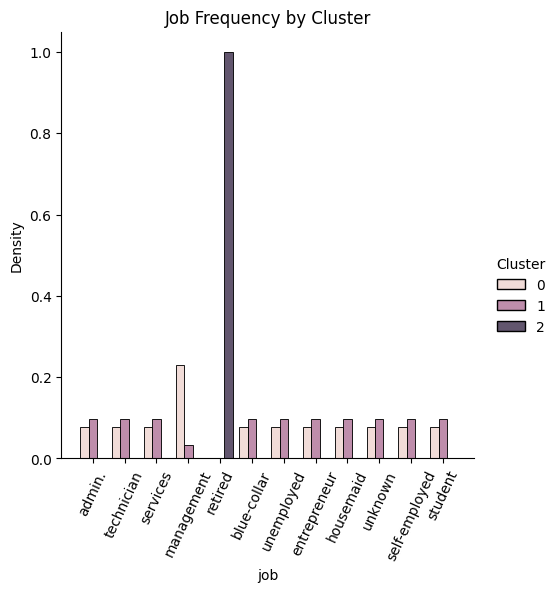

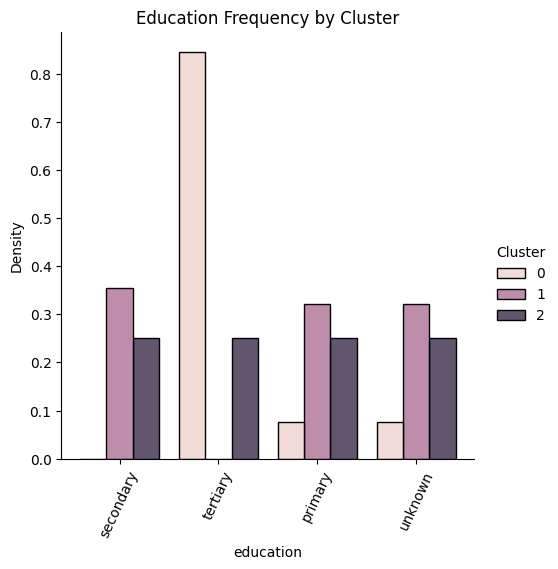

In [87]:
import seaborn as sns

df['Cluster'] = kmeans_model.labels_

df_original = pd.read_csv('accounts.csv')
df_original = df_original[['job', 'education']]
df_original = df_original.drop_duplicates().dropna()
df_original['Cluster'] = df['Cluster']

sns.displot(df_original, x='job', hue='Cluster', multiple='dodge', stat='density', shrink=0.8, common_norm=False)
plt.title('Job Frequency by Cluster')
plt.xticks(rotation=65)
plt.show()

sns.displot(df_original, x='education', hue='Cluster', multiple='dodge', stat='density', shrink=0.8, common_norm=False)
plt.title('Education Frequency by Cluster')
plt.xticks(rotation=65)
plt.show()